# **Project 2**
### Josh Winnes and Jon Contreras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import geopandas as gpd
import shapely
import skmob
from skmob.measures.individual import jump_lengths
from skmob.tessellation import tilers
from skmob.preprocessing import detection, clustering
from skmob.preprocessing import filtering

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.simplefilter("ignore")

import os
import sys

try:       
    kmz_file_path_josh = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/March 7, 2024 - Whistler Blackcomb(Josh).kmz'
    kmz_file_path_jon = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data/March 7, 2024 - Whistler Blackcomb(Jon).kmz'
    gpx_file_name_josh = 'March 7, 2024 - Whistler Blackcomb(Josh).gpx'
    gpx_file_name_jon = 'March 7, 2024 - Whistler Blackcomb(Jon).gpx'
    script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/Project2'
    
    os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
    sys.path.append(script_directory)
    from gpx_kmz_util import *
    
    gpx_josh, run_info_josh = data_preprocessing(gpx_file_name_josh, kmz_file_path_josh)
    gpx_jon, run_info_jon = data_preprocessing(gpx_file_name_jon, kmz_file_path_jon)
    
    print('Working from Josh\'s laptop')
except FileNotFoundError:
    
    data_dir = 'your_data_directory_path'
    kmz_file_path_josh = 'path_to_josh_kmz_file'
    kmz_fil_path_jon = 'path_to_jon_kmz_file'
    gpx_file_name_josh = 'gpx_file_name_josh'
    gpx_file_name_jon = 'gpx_file_name_jon'
    script_directory = 'path_to_Project2'
    
    os.chdir(data_dir)
    sys.path.append(script_directory)
    from gpx_kmz_util import *
    
    gpx_josh, run_info_josh = data_preprocessing(gpx_file_name_josh, kmz_file_path_josh)
    gpx_jon, run_info_jon = data_preprocessing(gpx_file_name_jon, kmz_file_path_jon)
    
    print('Working from Jonathan\'s laptop')

Working from Josh's laptop


In [2]:
gpx_josh.head(30)

Latitude   Longitude   Elevation                Time    Name   Distance  \
6   50.113067 -122.953366  691.382969 2024-03-07 09:49:35  Lift 1  10.185229   
7   50.112973 -122.953325  686.006277 2024-03-07 09:50:35  Lift 1  10.853508   
8   50.112877 -122.953391  681.919232 2024-03-07 09:51:15  Lift 1  11.666130   
9   50.112725 -122.953385  681.302449 2024-03-07 09:51:28  Lift 1  16.907066   
10  50.112610 -122.953356  684.615683 2024-03-07 09:51:31  Lift 1  12.953560   
11  50.112514 -122.953327  689.775607 2024-03-07 09:51:34  Lift 1  10.873181   
12  50.112421 -122.953324  695.575547 2024-03-07 09:51:37  Lift 1  10.343355   
13  50.112327 -122.953323  699.793268 2024-03-07 09:51:40  Lift 1  10.452581   
14  50.112226 -122.953329  703.528547 2024-03-07 09:51:43  Lift 1  11.238850   
15  50.112128 -122.953330  711.052965 2024-03-07 09:51:46  Lift 1  10.897351   
16  50.112027 -122.953328  713.646141 2024-03-07 09:51:49  Lift 1  11.231609   
17  50.111917 -122.953323  715.439203 2024-03-07 09:51:52  Lift 1  12.236654   
18  50.111814 -122.953315  716.934234 2024-03-07 09:51:55  Lift 1  11.467292   
19  50.111703 -122.953321  719.771861 2024-03-07 09:51:58  Lift 1  12.350067   
20  50.111593 -122.953318  722.471443 2024-03-07 09:52:01  Lift 1  12.233329   
21  50.111490 -122.953322  725.439456 2024-03-07 09:52:04  Lift 1  11.456645   
22  50.111381 -122.953324  728.870720 2024-03-07 09:52:07  Lift 1  12.121103   
23  50.111269 -122.953326  732.359033 2024-03-07 09:52:10  Lift 1  12.454666   
24  50.111161 -122.953339  735.782906 2024-03-07 09:52:13  Lift 1  12.044796   
25  50.111065 -122.953336  739.471050 2024-03-07 09:52:16  Lift 1  10.676871   
26  50.110962 -122.953327  741.964528 2024-03-07 09:52:19  Lift 1  11.471061   
27  50.110852 -122.953329  745.332133 2024-03-07 09:52:22  Lift 1  12.232290   
28  50.110742 -122.953327  745.429212 2024-03-07 09:52:25  Lift 1  12.232290   
29  50.110634 -122.953323  746.985790 2024-03-07 09:52:28  Lift 1  12.012456   
30  50.110525 -122.953326  748.482904 2024-03-07 09:52:31  Lift 1  12.122152   
31  50.110415 -122.953331  750.252360 2024-03-07 09:52:34  Lift 1  12.236655   
32  50.110313 -122.953323  752.957325 2024-03-07 09:52:37  Lift 1  11.356237   
33  50.110207 -122.953327  755.759268 2024-03-07 09:52:40  Lift 1  11.790130   
34  50.110101 -122.953328  757.068521 2024-03-07 09:52:43  Lift 1  11.786894   
35  50.109994 -122.953328  759.958366 2024-03-07 09:52:46  Lift 1  11.897874   

    Time_Diff     Speed  Speed_MPH  
6        22.0  0.462965   1.035623  
7        60.0  0.180892   0.404643  
8        40.0  0.291653   0.652410  
9        13.0  1.300544   2.909233  
10        3.0  4.317853   9.658763  
11        3.0  3.624394   8.107538  
12        3.0  3.447785   7.712475  
13        3.0  3.484194   7.793919  
14        3.0  3.746283   8.380197  
15        3.0  3.632450   8.125560  
16        3.0  3.743870   8.374798  
17        3.0  4.078885   9.124205  
18        3.0  3.822431   8.550534  
19        3.0  4.116689   9.208771  
20        3.0  4.077776   9.121726  
21        3.0  3.818882   8.542595  
22        3.0  4.040368   9.038045  
23        3.0  4.151555   9.286764  
24        3.0  4.014932   8.981147  
25        3.0  3.558957   7.961160  
26        3.0  3.823687   8.553344  
27        3.0  4.077430   9.120951  
28        3.0  4.077430   9.120951  
29        3.0  4.004152   8.957033  
30        3.0  4.040717   9.038827  
31        3.0  4.078885   9.124206  
32        3.0  3.785412   8.467726  
33        3.0  3.930043   8.791256  
34        3.0  3.928965   8.788844  
35        3.0  3.965958   8.871595

In [3]:
gpx_jon.head(30)

Latitude   Longitude   Elevation                Time    Name   Distance  \
3   50.109679 -122.953279  746.486242 2024-03-07 09:52:55  Lift 1   9.569422   
4   50.109586 -122.953275  748.005084 2024-03-07 09:52:58  Lift 1  10.345076   
5   50.109493 -122.953277  748.946129 2024-03-07 09:53:01  Lift 1  10.342126   
6   50.109389 -122.953282  749.281006 2024-03-07 09:53:03  Lift 1  11.569784   
7   50.109282 -122.953280  750.218117 2024-03-07 09:53:06  Lift 1  11.898728   
8   50.109176 -122.953279  751.754523 2024-03-07 09:53:09  Lift 1  11.786894   
9   50.109065 -122.953292  753.590171 2024-03-07 09:53:12  Lift 1  12.377421   
10  50.108962 -122.953287  755.042172 2024-03-07 09:53:15  Lift 1  11.458642   
11  50.108861 -122.953291  755.878658 2024-03-07 09:53:18  Lift 1  11.234325   
12  50.108770 -122.953288  756.732351 2024-03-07 09:53:21  Lift 1  10.121014   
13  50.108667 -122.953293  757.195077 2024-03-07 09:53:24  Lift 1  11.458642   
14  50.108542 -122.953294  758.438071 2024-03-07 09:53:27  Lift 1  13.899568   
15  50.108430 -122.953295  760.065340 2024-03-07 09:53:30  Lift 1  12.454053   
16  50.108315 -122.953301  760.343154 2024-03-07 09:53:33  Lift 1  12.794591   
17  50.108204 -122.953294  760.492356 2024-03-07 09:53:36  Lift 1  12.352745   
18  50.108094 -122.953301  760.565803 2024-03-07 09:53:39  Lift 1  12.241641   
19  50.107992 -122.953297  762.045608 2024-03-07 09:53:42  Lift 1  11.345485   
20  50.107892 -122.953297  762.554306 2024-03-07 09:53:45  Lift 1  11.119508   
21  50.107784 -122.953297  764.996004 2024-03-07 09:53:48  Lift 1  12.009069   
22  50.107680 -122.953304  768.718456 2024-03-07 09:53:52  Lift 1  11.575058   
23  50.107584 -122.953300  772.404578 2024-03-07 09:53:55  Lift 1  10.678538   
24  50.107481 -122.953290  777.066299 2024-03-07 09:53:58  Lift 1  11.475275   
25  50.107361 -122.953294  781.801406 2024-03-07 09:54:01  Lift 1  13.346458   
26  50.107251 -122.953291  788.362930 2024-03-07 09:54:04  Lift 1  12.233330   
27  50.107150 -122.953292  794.868096 2024-03-07 09:54:07  Lift 1  11.230930   
28  50.107058 -122.953299  800.746714 2024-03-07 09:54:10  Lift 1  10.242120   
29  50.106963 -122.953298  806.357489 2024-03-07 09:54:13  Lift 1  10.563773   
30  50.106858 -122.953299  811.540760 2024-03-07 09:54:16  Lift 1  11.675701   
31  50.106738 -122.953299  818.751512 2024-03-07 09:54:20  Lift 1  13.343410   
32  50.106638 -122.953290  824.242569 2024-03-07 09:54:23  Lift 1  11.138017   

    Time_Diff     Speed  Speed_MPH  
3         2.0  4.784711  10.703094  
4         3.0  3.448359   7.713758  
5         3.0  3.447375   7.711559  
6         2.0  5.784892  12.940435  
7         3.0  3.966243   8.872232  
8         3.0  3.928965   8.788844  
9         3.0  4.125807   9.229167  
10        3.0  3.819547   8.544084  
11        3.0  3.744775   8.376823  
12        3.0  3.373671   7.546688  
13        3.0  3.819547   8.544084  
14        3.0  4.633189  10.364149  
15        3.0  4.151351   9.286308  
16        3.0  4.264864   9.540228  
17        3.0  4.117582   9.210768  
18        3.0  4.080547   9.127924  
19        3.0  3.781828   8.459709  
20        3.0  3.706503   8.291210  
21        3.0  4.003023   8.954507  
22        4.0  2.893764   6.473167  
23        3.0  3.559513   7.962403  
24        3.0  3.825092   8.556486  
25        3.0  4.448819   9.951726  
26        3.0  4.077777   9.121726  
27        3.0  3.743643   8.374291  
28        3.0  3.414040   7.636990  
29        3.0  3.521258   7.876829  
30        3.0  3.891900   8.705933  
31        4.0  3.335852   7.462089  
32        3.0  3.712672   8.305012

In [4]:
run_info_josh

Name   Longitude   Latitude    Elevation  \
0                            Lift 1 -122.953366  50.113067   691.382969   
1                             Run 1 -122.951056  50.078425  1681.088996   
2                            Lift 2 -122.963743  50.085441  1301.686260   
3                             Run 2 -122.947029  50.067096  1855.330032   
5                            Lift 3 -122.952236  50.066824  1779.142854   
6                             Run 3 -122.957573  50.059251  2183.242267   
8                            Lift 4 -122.964118  50.085837  1299.682279   
9                             Run 4 -122.947552  50.066370  1853.043952   
10                           Lift 5 -122.952248  50.066714  1772.088558   
11                            Run 5 -122.957416  50.059398  2178.784326   
12                           Lift 6 -122.952123  50.066880  1775.880465   
13                            Run 6 -122.957556  50.059226  2173.845804   
15        Lift 7 (Symphony Express) -122.918304  50.058562  1529.177429   
16                            Run 7 -122.939676  50.046135  2037.706992   
18       Lift 8 (Excalibur Gondola) -122.953055  50.113367   684.840619   
19     Lift 9 (Excelerator Express) -122.922870  50.111723  1130.863379   
20                            Run 8 -122.904950  50.103412  1644.898104   
22        Lift 10 (Glacier Express) -122.899644  50.106319  1540.697266   
23                            Run 9 -122.881405  50.096123  2131.747556   
24  Lift 11 (Crystal Ridge Express) -122.906160  50.118756  1296.043749   
25                           Run 10 -122.891876  50.107393  1828.130413   
26   Lift 12 (Jersey Cream Express) -122.900906  50.106330  1550.095512   
27                           Run 11 -122.897995  50.094229  1918.686769   
28            Lift 13 (Peak 2 Peak) -122.900802  50.095627  1873.038610   
29                           Run 12 -122.945875  50.069642  1828.492283   

                        Time    time_elapsed                  end_time  
0  2024-03-07 09:49:35-08:00 0 days 00:22:04 2024-03-07 10:11:39-08:00  
1  2024-03-07 10:11:39-08:00 0 days 00:10:54 2024-03-07 10:22:33-08:00  
2  2024-03-07 10:22:33-08:00 0 days 00:13:51 2024-03-07 10:36:24-08:00  
3  2024-03-07 10:36:24-08:00 0 days 00:06:53 2024-03-07 10:43:17-08:00  
5  2024-03-07 10:43:17-08:00 0 days 00:04:03 2024-03-07 10:47:20-08:00  
6  2024-03-07 10:47:20-08:00 0 days 01:17:11 2024-03-07 12:04:31-08:00  
8  2024-03-07 12:04:31-08:00 0 days 00:11:38 2024-03-07 12:16:09-08:00  
9  2024-03-07 12:16:09-08:00 0 days 00:02:54 2024-03-07 12:19:03-08:00  
10 2024-03-07 12:19:03-08:00 0 days 00:03:50 2024-03-07 12:22:53-08:00  
11 2024-03-07 12:22:53-08:00 0 days 00:15:21 2024-03-07 12:38:14-08:00  
12 2024-03-07 12:38:14-08:00 0 days 00:04:13 2024-03-07 12:42:27-08:00  
13 2024-03-07 12:42:27-08:00 0 days 12:20:59 2024-03-07 01:03:26-08:00  
15 2024-03-07 01:03:26-08:00 0 days 00:07:55 2024-03-07 01:11:21-08:00  
16 2024-03-07 01:11:21-08:00 0 days 01:02:29 2024-03-07 02:13:50-08:00  
18 2024-03-07 02:13:50-08:00 0 days 00:16:41 2024-03-07 02:30:31-08:00  
19 2024-03-07 02:30:31-08:00 0 days 00:06:39 2024-03-07 02:37:10-08:00  
20 2024-03-07 02:37:10-08:00 0 days 00:02:56 2024-03-07 02:40:06-08:00  
22 2024-03-07 02:40:06-08:00 0 days 00:10:23 2024-03-07 02:50:29-08:00  
23 2024-03-07 02:50:29-08:00 0 days 00:26:47 2024-03-07 03:17:16-08:00  
24 2024-03-07 03:17:16-08:00 0 days 00:11:03 2024-03-07 03:28:19-08:00  
25 2024-03-07 03:28:19-08:00 0 days 00:15:18 2024-03-07 03:43:37-08:00  
26 2024-03-07 03:43:37-08:00 0 days 00:06:07 2024-03-07 03:49:44-08:00  
27 2024-03-07 03:49:44-08:00 0 days 00:05:08 2024-03-07 03:54:52-08:00  
28 2024-03-07 03:54:52-08:00 0 days 00:12:28 2024-03-07 04:07:20-08:00  
29 2024-03-07 04:07:20-08:00             NaT                       NaT

In [5]:
run_info_jon

Name   Longitude   Latitude    Elevation  \
0                           Lift 1 -122.953279  50.109679   746.486242   
1                            Run 1 -122.951039  50.079034  1678.810227   
3                           Lift 2 -122.963696  50.085477  1294.527448   
4                            Run 2 -122.947079  50.067145  1844.829283   
5                           Lift 3 -122.952012  50.067018  1772.808738   
6                            Run 3 -122.957425  50.059362  2170.953821   
7                           Lift 4 -122.988703  50.093790   656.509161   
8                            Run 4 -122.963043  50.058412  2059.593358   
9     Lift 5 (Excelerator Express) -122.922710  50.111669  1126.007092   
10                           Run 5 -122.904938  50.103308  1634.285129   
11  Lift 6 (Crystal Ridge Express) -122.905995  50.118685  1301.512253   
12                           Run 6 -122.891418  50.107585  1818.899374   
13   Lift 7 (Jersey Cream Express) -122.900825  50.106295  1538.142968   
14                           Run 7 -122.898443  50.094328  1906.705377   
15            Lift 8 (Peak 2 Peak) -122.901114  50.095344  1872.916566   
16                          Lift 9 -122.949931  50.112609   701.043930   
17                           Run 8 -122.943917  50.110802   767.850232   

                        Time    time_elapsed                  end_time  
0  2024-03-07 09:52:55-08:00 0 days 00:17:35 2024-03-07 10:10:30-08:00  
1  2024-03-07 10:10:30-08:00 0 days 00:12:03 2024-03-07 10:22:33-08:00  
3  2024-03-07 10:22:33-08:00 0 days 00:13:53 2024-03-07 10:36:26-08:00  
4  2024-03-07 10:36:26-08:00 0 days 00:06:09 2024-03-07 10:42:35-08:00  
5  2024-03-07 10:42:35-08:00 0 days 00:04:37 2024-03-07 10:47:12-08:00  
6  2024-03-07 10:47:12-08:00 0 days 01:04:53 2024-03-07 11:52:05-08:00  
7  2024-03-07 11:52:05-08:00 0 days 00:39:09 2024-03-07 12:31:14-08:00  
8  2024-03-07 12:31:14-08:00 0 days 01:45:49 2024-03-07 14:17:03-08:00  
9  2024-03-07 14:17:03-08:00 0 days 00:09:30 2024-03-07 14:26:33-08:00  
10 2024-03-07 14:26:33-08:00 0 days 00:16:58 2024-03-07 14:43:31-08:00  
11 2024-03-07 14:43:31-08:00 0 days 00:08:35 2024-03-07 14:52:06-08:00  
12 2024-03-07 14:52:06-08:00 0 days 00:15:36 2024-03-07 15:07:42-08:00  
13 2024-03-07 15:07:42-08:00 0 days 00:06:50 2024-03-07 15:14:32-08:00  
14 2024-03-07 15:14:32-08:00 0 days 00:06:36 2024-03-07 15:21:08-08:00  
15 2024-03-07 15:21:08-08:00 0 days 00:50:42 2024-03-07 16:11:50-08:00  
16 2024-03-07 16:11:50-08:00 0 days 00:04:46 2024-03-07 16:16:36-08:00  
17 2024-03-07 16:16:36-08:00             NaT                       NaT

### ***Visualizing the Data***

In [6]:
# For Jon

jon_trajectory = skmob.TrajDataFrame(gpx_jon, latitude='Latitude', longitude='Longitude', datetime='Time')
jon_trajectory["jump_length"] = jump_lengths(jon_trajectory)

# For Josh

josh_trajectory = skmob.TrajDataFrame(gpx_josh, latitude='Latitude', longitude='Longitude', datetime='Time')
josh_trajectory['jump_length'] = jump_lengths(josh_trajectory)

In [49]:
from skmob.preprocessing import compression

gpx_jon_stay_location = detection.stay_locations(jon_trajectory, 
    stop_radius_factor=0.02, minutes_for_a_stop=3, spatial_radius_km=0.1, leaving_time=True)

gpx_josh_stay_location = detection.stay_locations(josh_trajectory, 
    stop_radius_factor=0.02, minutes_for_a_stop=2, spatial_radius_km=0.1, leaving_time=True)

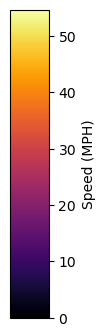

In [50]:
import folium

start_lat = josh_trajectory['lat'].mean()
start_long = josh_trajectory['lng'].mean()

josh_map = folium.Map(location=[start_lat, start_long], zoom_start=13, tiles='CartoDB positron')
add_staypionts(gpx_josh_stay_location, josh_map)
add_speed_heatmap(gpx_josh, josh_map)

josh_map

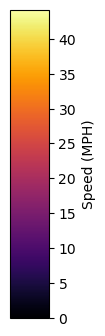

In [9]:
import folium

start_lat = jon_trajectory['lat'].mean()
start_long = jon_trajectory['lng'].mean()

jon_map = folium.Map(location=[start_lat, start_long], zoom_start=13, tiles='CartoDB positron')
add_staypionts(gpx_jon_stay_location, jon_map)
add_speed_heatmap(gpx_jon, jon_map)
jon_map

In [10]:
gpx_jon.head()

Latitude   Longitude   Elevation                Time    Name   Distance  \
3  50.109679 -122.953279  746.486242 2024-03-07 09:52:55  Lift 1   9.569422   
4  50.109586 -122.953275  748.005084 2024-03-07 09:52:58  Lift 1  10.345076   
5  50.109493 -122.953277  748.946129 2024-03-07 09:53:01  Lift 1  10.342126   
6  50.109389 -122.953282  749.281006 2024-03-07 09:53:03  Lift 1  11.569784   
7  50.109282 -122.953280  750.218117 2024-03-07 09:53:06  Lift 1  11.898728   

   Time_Diff     Speed  Speed_MPH  
3        2.0  4.784711  10.703094  
4        3.0  3.448359   7.713758  
5        3.0  3.447375   7.711559  
6        2.0  5.784892  12.940435  
7        3.0  3.966243   8.872232

### ***Calculating Max Speed and Wait Time***

#### separating by run/lift

In [11]:
run_info_josh = run_info_josh.merge(gpx_josh.groupby('Name').max('Speed')['Speed_MPH'], on='Name', how='left')
run_info_josh = run_info_josh.merge(gpx_josh.groupby('Name').mean('Speed')['Speed_MPH'], on = 'Name', how = 'left')

In [12]:
run_info_josh.rename(columns={
    'Speed_MPH_x':'Max_Speed_MPH',
    'Speed_MPH_y':'Mean_Speed_MPH'
}, inplace=True)

In [13]:
run_info_josh.sort_values(by='Max_Speed_MPH', ascending=False)

Name   Longitude   Latitude    Elevation  \
9                             Run 5 -122.957416  50.059398  2178.784326   
5                             Run 3 -122.957573  50.059251  2183.242267   
13                            Run 7 -122.939676  50.046135  2037.706992   
18                            Run 9 -122.881405  50.096123  2131.747556   
24                           Run 12 -122.945875  50.069642  1828.492283   
20                           Run 10 -122.891876  50.107393  1828.130413   
7                             Run 4 -122.947552  50.066370  1853.043952   
16                            Run 8 -122.904950  50.103412  1644.898104   
1                             Run 1 -122.951056  50.078425  1681.088996   
11                            Run 6 -122.957556  50.059226  2173.845804   
0                            Lift 1 -122.953366  50.113067   691.382969   
22                           Run 11 -122.897995  50.094229  1918.686769   
23            Lift 13 (Peak 2 Peak) -122.900802  50.095627  1873.038610   
3                             Run 2 -122.947029  50.067096  1855.330032   
14       Lift 8 (Excalibur Gondola) -122.953055  50.113367   684.840619   
8                            Lift 5 -122.952248  50.066714  1772.088558   
6                            Lift 4 -122.964118  50.085837  1299.682279   
10                           Lift 6 -122.952123  50.066880  1775.880465   
15     Lift 9 (Excelerator Express) -122.922870  50.111723  1130.863379   
2                            Lift 2 -122.963743  50.085441  1301.686260   
12        Lift 7 (Symphony Express) -122.918304  50.058562  1529.177429   
21   Lift 12 (Jersey Cream Express) -122.900906  50.106330  1550.095512   
4                            Lift 3 -122.952236  50.066824  1779.142854   
19  Lift 11 (Crystal Ridge Express) -122.906160  50.118756  1296.043749   
17        Lift 10 (Glacier Express) -122.899644  50.106319  1540.697266   

                        Time    time_elapsed                  end_time  \
9  2024-03-07 12:22:53-08:00 0 days 00:15:21 2024-03-07 12:38:14-08:00   
5  2024-03-07 10:47:20-08:00 0 days 01:17:11 2024-03-07 12:04:31-08:00   
13 2024-03-07 01:11:21-08:00 0 days 01:02:29 2024-03-07 02:13:50-08:00   
18 2024-03-07 02:50:29-08:00 0 days 00:26:47 2024-03-07 03:17:16-08:00   
24 2024-03-07 04:07:20-08:00             NaT                       NaT   
20 2024-03-07 03:28:19-08:00 0 days 00:15:18 2024-03-07 03:43:37-08:00   
7  2024-03-07 12:16:09-08:00 0 days 00:02:54 2024-03-07 12:19:03-08:00   
16 2024-03-07 02:37:10-08:00 0 days 00:02:56 2024-03-07 02:40:06-08:00   
1  2024-03-07 10:11:39-08:00 0 days 00:10:54 2024-03-07 10:22:33-08:00   
11 2024-03-07 12:42:27-08:00 0 days 12:20:59 2024-03-07 01:03:26-08:00   
0  2024-03-07 09:49:35-08:00 0 days 00:22:04 2024-03-07 10:11:39-08:00   
22 2024-03-07 03:49:44-08:00 0 days 00:05:08 2024-03-07 03:54:52-08:00   
23 2024-03-07 03:54:52-08:00 0 days 00:12:28 2024-03-07 04:07:20-08:00   
3  2024-03-07 10:36:24-08:00 0 days 00:06:53 2024-03-07 10:43:17-08:00   
14 2024-03-07 02:13:50-08:00 0 days 00:16:41 2024-03-07 02:30:31-08:00   
8  2024-03-07 12:19:03-08:00 0 days 00:03:50 2024-03-07 12:22:53-08:00   
6  2024-03-07 12:04:31-08:00 0 days 00:11:38 2024-03-07 12:16:09-08:00   
10 2024-03-07 12:38:14-08:00 0 days 00:04:13 2024-03-07 12:42:27-08:00   
15 2024-03-07 02:30:31-08:00 0 days 00:06:39 2024-03-07 02:37:10-08:00   
2  2024-03-07 10:22:33-08:00 0 days 00:13:51 2024-03-07 10:36:24-08:00   
12 2024-03-07 01:03:26-08:00 0 days 00:07:55 2024-03-07 01:11:21-08:00   
21 2024-03-07 03:43:37-08:00 0 days 00:06:07 2024-03-07 03:49:44-08:00   
4  2024-03-07 10:43:17-08:00 0 days 00:04:03 2024-03-07 10:47:20-08:00   
19 2024-03-07 03:17:16-08:00 0 days 00:11:03 2024-03-07 03:28:19-08:00   
17 2024-03-07 02:40:06-08:00 0 days 00:10:23 2024-03-07 02:50:29-08:00   

    Max_Speed_MPH  Mean_Speed_MPH  
9       54.727813       18.404235  
5       49.069620       13.076065  
13      46.833660       18.999229  
18      45.

In [14]:
run_info_jon = run_info_jon.merge(gpx_jon.groupby('Name').max('Speed')['Speed_MPH'], on='Name', how='left')
run_info_jon = run_info_jon.merge(gpx_jon.groupby('Name').mean('Speed')['Speed_MPH'], on = 'Name', how = 'left')

In [15]:
run_info_jon.rename(columns={
    'Speed_MPH_x':'Max_Speed_MPH',
    'Speed_MPH_y':'Mean_Speed_MPH'
}, inplace=True)

In [16]:
run_info_jon.sort_values(by='Max_Speed_MPH', ascending=False)

Name   Longitude   Latitude    Elevation  \
7                            Run 4 -122.963043  50.058412  2059.593358   
5                            Run 3 -122.957425  50.059362  2170.953821   
1                            Run 1 -122.951039  50.079034  1678.810227   
11                           Run 6 -122.891418  50.107585  1818.899374   
16                           Run 8 -122.943917  50.110802   767.850232   
9                            Run 5 -122.904938  50.103308  1634.285129   
13                           Run 7 -122.898443  50.094328  1906.705377   
14            Lift 8 (Peak 2 Peak) -122.901114  50.095344  1872.916566   
3                            Run 2 -122.947079  50.067145  1844.829283   
0                           Lift 1 -122.953279  50.109679   746.486242   
8     Lift 5 (Excelerator Express) -122.922710  50.111669  1126.007092   
12   Lift 7 (Jersey Cream Express) -122.900825  50.106295  1538.142968   
15                          Lift 9 -122.949931  50.112609   701.043930   
4                           Lift 3 -122.952012  50.067018  1772.808738   
2                           Lift 2 -122.963696  50.085477  1294.527448   
6                           Lift 4 -122.988703  50.093790   656.509161   
10  Lift 6 (Crystal Ridge Express) -122.905995  50.118685  1301.512253   

                        Time    time_elapsed                  end_time  \
7  2024-03-07 12:31:14-08:00 0 days 01:45:49 2024-03-07 14:17:03-08:00   
5  2024-03-07 10:47:12-08:00 0 days 01:04:53 2024-03-07 11:52:05-08:00   
1  2024-03-07 10:10:30-08:00 0 days 00:12:03 2024-03-07 10:22:33-08:00   
11 2024-03-07 14:52:06-08:00 0 days 00:15:36 2024-03-07 15:07:42-08:00   
16 2024-03-07 16:16:36-08:00             NaT                       NaT   
9  2024-03-07 14:26:33-08:00 0 days 00:16:58 2024-03-07 14:43:31-08:00   
13 2024-03-07 15:14:32-08:00 0 days 00:06:36 2024-03-07 15:21:08-08:00   
14 2024-03-07 15:21:08-08:00 0 days 00:50:42 2024-03-07 16:11:50-08:00   
3  2024-03-07 10:36:26-08:00 0 days 00:06:09 2024-03-07 10:42:35-08:00   
0  2024-03-07 09:52:55-08:00 0 days 00:17:35 2024-03-07 10:10:30-08:00   
8  2024-03-07 14:17:03-08:00 0 days 00:09:30 2024-03-07 14:26:33-08:00   
12 2024-03-07 15:07:42-08:00 0 days 00:06:50 2024-03-07 15:14:32-08:00   
15 2024-03-07 16:11:50-08:00 0 days 00:04:46 2024-03-07 16:16:36-08:00   
4  2024-03-07 10:42:35-08:00 0 days 00:04:37 2024-03-07 10:47:12-08:00   
2  2024-03-07 10:22:33-08:00 0 days 00:13:53 2024-03-07 10:36:26-08:00   
6  2024-03-07 11:52:05-08:00 0 days 00:39:09 2024-03-07 12:31:14-08:00   
10 2024-03-07 14:43:31-08:00 0 days 00:08:35 2024-03-07 14:52:06-08:00   

    Max_Speed_MPH  Mean_Speed_MPH  
7       44.241515       14.486475  
5       34.725175        9.818135  
1       33.734539       16.474826  
11      29.674726       10.788276  
16      29.102227       13.538103  
9       28.485402       13.217084  
13      28.248055       14.298114  
14      22.843893       12.878983  
3       19.193002       10.257934  
0       12.940435        8.473981  
8       12.421654        8.646542  
12      12.095579        8.563964  
15      12.089279        8.436973  
4       11.545107        8.450681  
2       11.189706        8.916920  
6       10.008886        8.434486  
10       9.907628        8.491691

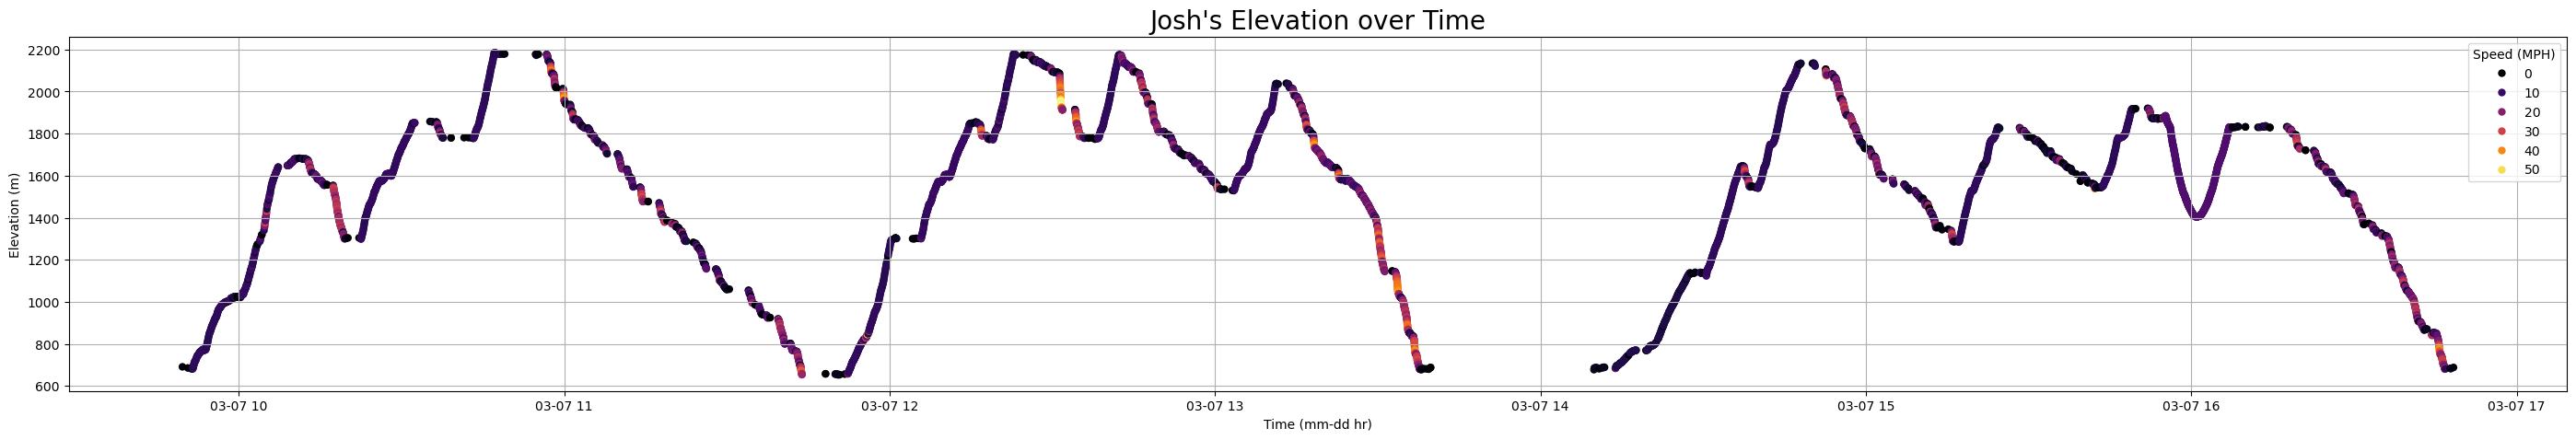

In [17]:
plt.figure(figsize=(35, 5))
sns.scatterplot(data=gpx_josh, x='Time', y='Elevation', hue='Speed_MPH', edgecolor='none', palette=plt.cm.inferno)
plt.title('Josh\'s Elevation over Time', fontsize=20)
plt.grid(True)
plt.ylabel('Elevation (m)')
plt.xlabel('Time (mm-dd hr)')
plt.legend(title='Speed (MPH)')

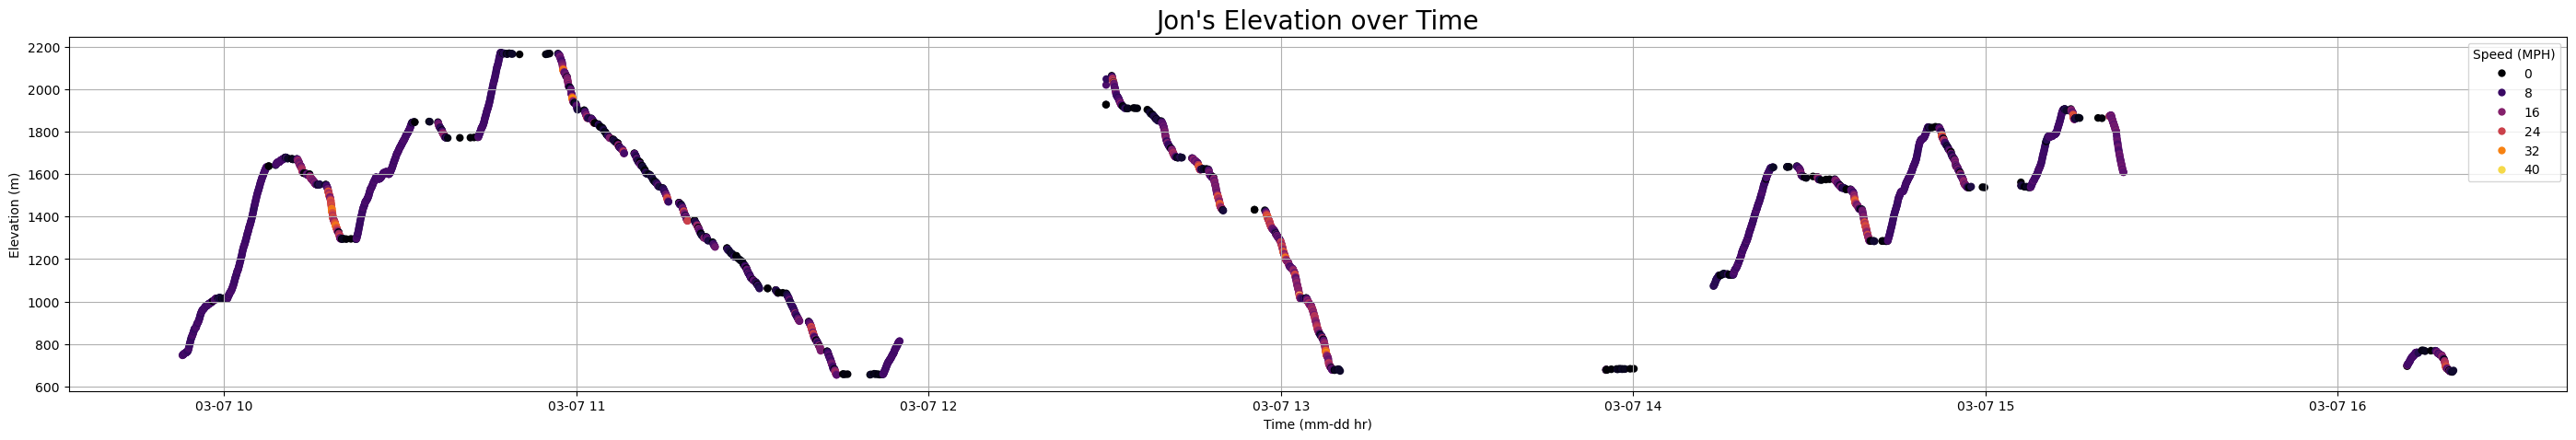

In [71]:
plt.figure(figsize=(35, 5))
sns.scatterplot(data=gpx_jon, x='Time', y='Elevation', hue='Speed_MPH', edgecolor='none', palette=plt.cm.inferno)
plt.title('Jon\'s Elevation over Time', fontsize=20)
plt.grid(True)
plt.ylabel('Elevation (m)')
plt.xlabel('Time (mm-dd hr)')
plt.legend(title='Speed (MPH)')

### ***JONs CODE***

In [51]:
# Define constants for the barometric formula
P0 = 101325        # Sea level standard atmospheric pressure (Pa)
L = 0.0065         # Temperature lapse rate (K/m)
T0 = 288.15        # Sea level standard temperature (K)
g = 9.80665        # Acceleration due to gravity (m/s^2)
M = 0.0289644      # Molar mass of Earth's air (kg/mol)
R = 8.3144598      # Universal gas constant (J/(mol*K))

# Compute atmospheric pressure using the barometric formula
gpx_josh['Atmospheric Pressure (Pa)'] = P0 * (1 - (L * gpx_josh['Elevation']) / T0) ** (g * M / (R * L))

#convert Pa to mmgh
gpx_josh['Atmospheric Pressure (mmgh)'] = gpx_josh['Atmospheric Pressure (Pa)']*0.00750062

In [52]:
# Oxygen-hemoglobin dissociation model while accounting for speed

#Reminder of defined constants
FiO2 = 0.21  # Fraction of inspired oxygen
PH2O = 47    # Water vapor pressure in mmHg at body temperature
P50 = 27     # PaO2 at 50% SpO2
n = 2.5      # Shape factor for dissociation curve

# Function to calculate SpO2 with speed adjustments for each row of the DF
def calculate_spo2_with_speed(row):
    # Dynamic adjustments based on speed
    speed = row['Speed']  # speed in m/s or your chosen units
   
    # Adjust PaCO2: higher speed -> lower PaCO2 (hyperventilation effect)
    base_pa_co2 = 40  # base PaCO2 at low speeds
    min_pa_co2 = 30   # minimum PaCO2 at high speeds
    pa_co2 = max(min_pa_co2, base_pa_co2 - 0.2 * speed)  # adjust linearly with speed
   
    # Adjust R: higher speed -> higher R (more carbs burned at high intensity)
    base_r = 0.8  # R at low speeds
    max_r = 1.0   # R at high speeds
    r = min(max_r, base_r + 0.1 * speed)  # adjust linearly with speed

    # Calculate PiO2
    PiO2 = FiO2 * (row['Atmospheric Pressure (mmgh)'] - PH2O)
   
    # Calculate PAO2 using the dynamically adjusted PaCO2 and R
    PAO2 = PiO2 - (pa_co2 / r)
   
    # Calculate SpO2 using the oxygen-hemoglobin dissociation curve
    SpO2 = 100 * (PAO2 ** n) / ((PAO2 ** n) + (P50 ** n))
    return SpO2

# Apply the function to each row in DF
gpx_josh['SpO2.2'] = gpx_josh.apply(calculate_spo2_with_speed, axis=1)

In [53]:
name_mappings = {
    'Lift 7 (Symphony Express)': 'Lift 7',
    'Lift 8 (Excalibur Gondola)': 'Lift 8',
    'Lift 9 (Excelerator Express)': 'Lift 9',
    'Lift 10 (Glacier Express)': 'Lift 10',
    'Lift 11 (Crystal Ridge Express)': 'Lift 11',
    'Lift 12 (Jersey Cream Express)': 'Lift 12',
    'Lift 13 (Peak 2 Peak)': 'Lift 13'
}
gpx_josh['Name'] = gpx_josh['Name'].replace(name_mappings)


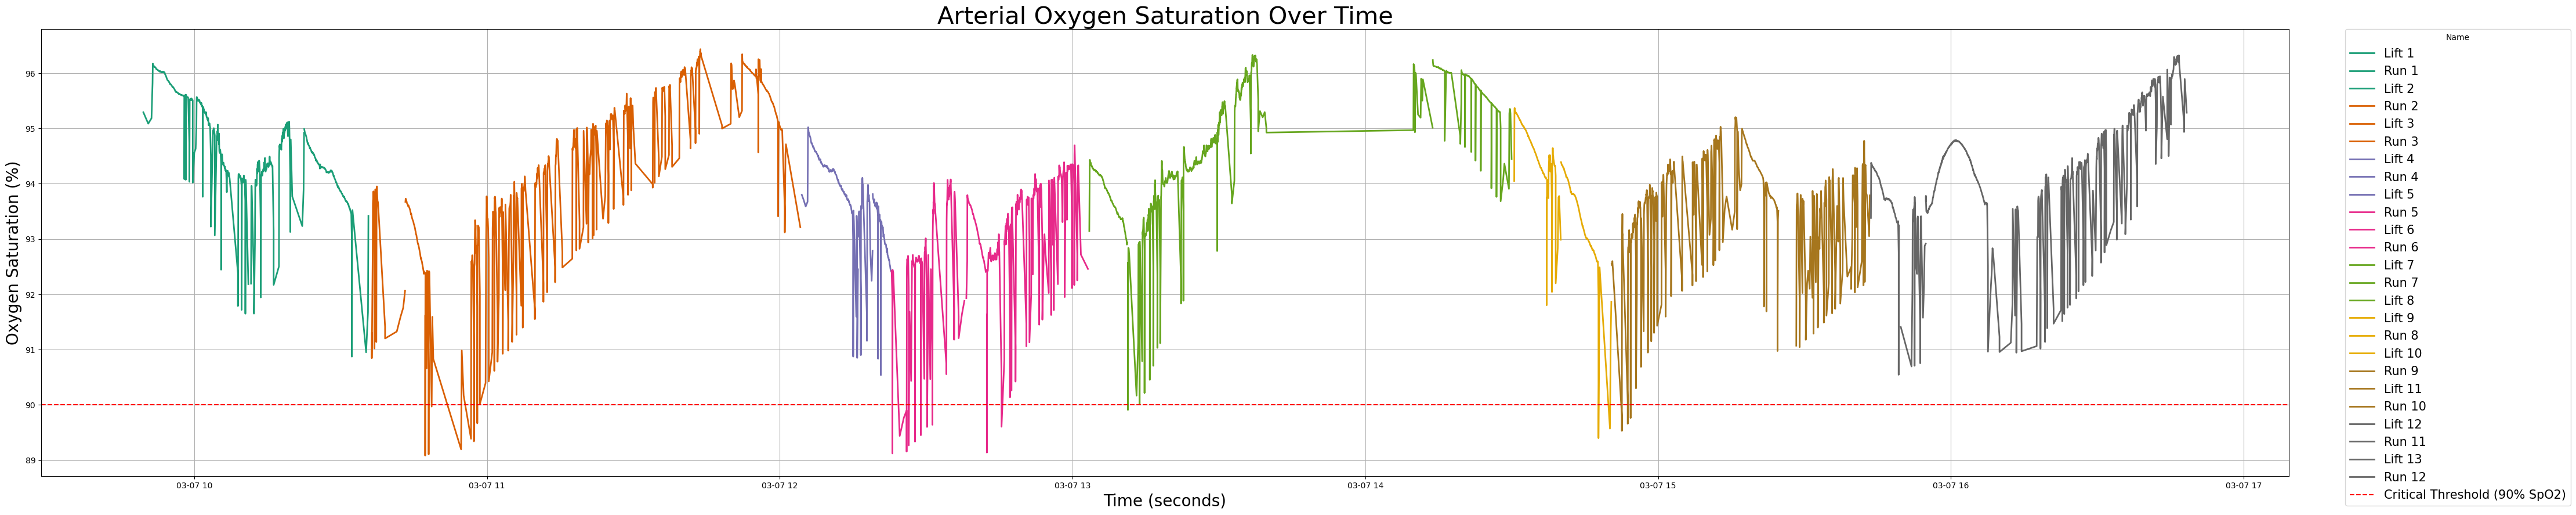

In [69]:
colors = plt.cm.Dark2(np.linspace(0, 1, len(gpx_josh['Name'].unique())))
plt.figure(figsize=(50, 10))
name_color_map = {name: colors[i] for i, name in enumerate(gpx_josh['Name'].unique())}

for name in gpx_josh['Name'].unique(): #coloring by column variable 'Name'
    group_data = gpx_josh[gpx_josh['Name'] == name]
    plt.plot(group_data['Time'], group_data['SpO2.2'], linewidth=2, label=name, color=name_color_map[name])

plt.axhline(y=90, color='red', linestyle='--', label='Critical Threshold (90% SpO2)')
plt.title('Arterial Oxygen Saturation Over Time', fontsize = 30)
plt.xlabel('Time (seconds)', fontsize = 20)
plt.ylabel('Oxygen Saturation (%)', fontsize=20)
plt.legend(title='Name', bbox_to_anchor=(1.025, 1), loc='upper left', borderaxespad=0., fontsize=15)
plt.grid(True)
plt.show()

### ***Conclusions***

In [33]:
run1_drop = gpx_josh[gpx_josh['Name']=='Run 1']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 1']['Elevation'].min()
run1_drop

382.28847500000006

In [34]:
run2_drop = gpx_josh[gpx_josh['Name']=='Run 2']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 2']['Elevation'].min()
run2_drop

77.89730800000007

In [35]:
run3_drop = gpx_josh[gpx_josh['Name']=='Run 3']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 3']['Elevation'].min()
run3_drop

1530.056658

In [36]:
run4_drop = gpx_josh[gpx_josh['Name']=='Run 4']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 4']['Elevation'].min()
run4_drop

81.2822000000001

In [37]:
run5_drop = gpx_josh[gpx_josh['Name']=='Run 5']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 5']['Elevation'].min()
run5_drop



404.92882499999996

In [38]:
run6_drop = gpx_josh[gpx_josh['Name']=='Run 6']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 6']['Elevation'].min()
run6_drop

643.4475890000001

In [39]:
run7_drop = gpx_josh[gpx_josh['Name']=='Run 7']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 7']['Elevation'].min()
run7_drop

1361.641708

In [40]:
run8_drop = gpx_josh[gpx_josh['Name']=='Run 8']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 8']['Elevation'].min()
run8_drop

104.46923700000002

In [41]:
run9_drop = gpx_josh[gpx_josh['Name']=='Run 9']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 9']['Elevation'].min()
run9_drop

846.9731109999998

In [42]:
run10_drop = gpx_josh[gpx_josh['Name']=='Run 10']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 10']['Elevation'].min()
run10_drop

289.200871

In [43]:
run11_drop = gpx_josh[gpx_josh['Name']=='Run 11']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 11']['Elevation'].min()
run11_drop

50.79650700000002

In [44]:
run12_drop = gpx_josh[gpx_josh['Name']=='Run 12']['Elevation'].max()-gpx_josh[gpx_josh['Name']=='Run 12']['Elevation'].min()
run12_drop

1155.8357500000002

In [46]:
josh_vert_drop = run1_drop+run2_drop+run3_drop+run4_drop+run5_drop+run6_drop+run7_drop+run8_drop+run9_drop+run10_drop+run11_drop+run12_drop
josh_vert_drop

6928.818239

In [47]:
josh_vert_drop_feet = josh_vert_drop*3.28084
josh_vert_drop_feet

22732.344031240762